   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

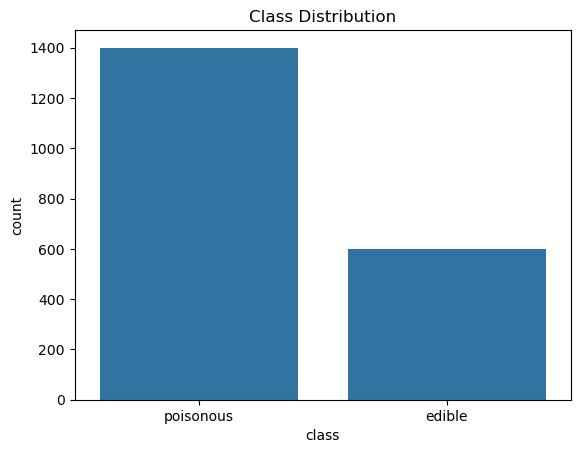

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Mushroom dataset
url = ("C:\\Users\\hp\\Downloads\\SVM\\SVM\\mushroom.csv")  # Replace with the correct file path in your Colab
mushroom_data = pd.read_csv(url)

# Display first few rows and summary of the dataset
print(mushroom_data.head())
print(mushroom_data.info())

# Visualize the distribution of each feature (example)
sns.countplot(x='class', data=mushroom_data)
plt.title('Class Distribution')
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
labelencoder = LabelEncoder()
for column in mushroom_data.columns:
    mushroom_data[column] = labelencoder.fit_transform(mushroom_data[column])

# Split the data into features and target
X = mushroom_data.drop('class', axis=1)
y = mushroom_data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

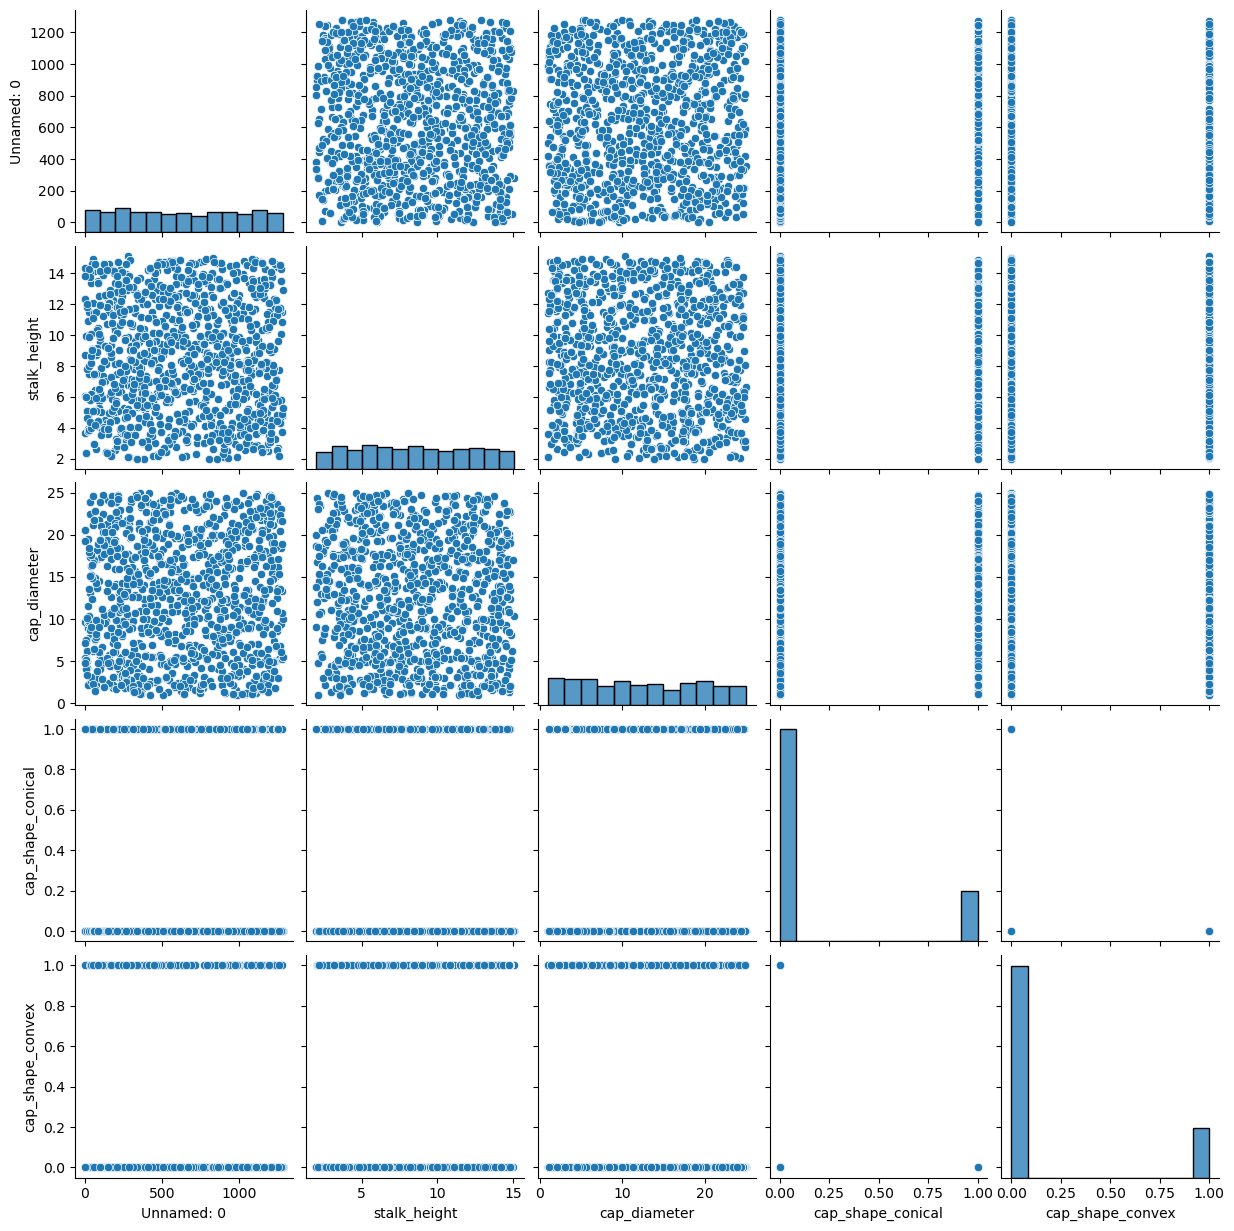

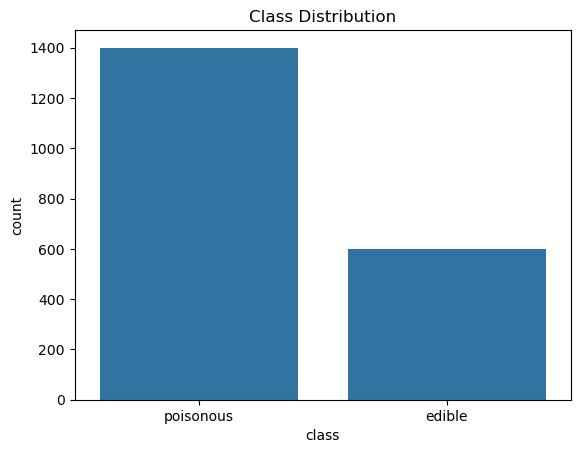

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
mushroom_data = pd.read_csv("C:\\Users\\hp\\Downloads\\SVM\\SVM\\mushroom.csv")

# Perform data encoding (if not done already)
# Assuming all columns are categorical in the Mushroom dataset
encoded_data = pd.get_dummies(mushroom_data, drop_first=True)

# Task 3: Data Visualization

# Pair plot (for a subset of features)
sns.pairplot(encoded_data.iloc[:, :5])  # Adjust column range as necessary
plt.show()

# Visualize class distribution
# Identify the correct target column, for instance, 'class'
target_column = 'class'  # Replace with the actual target column name if it's different
sns.countplot(x=target_column, data=mushroom_data)
plt.title("Class Distribution")
plt.show()

In [4]:
# Task 4: SVM Implementation
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Scale features (ensure X_train and X_test are DataFrames)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # X_train should be a DataFrame
X_test_scaled = scaler.transform(X_test)  # X_test should also be a DataFrame

# Convert scaled features back to DataFrames to maintain feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Create and train the SVM model
model = SVC(kernel='linear', class_weight='balanced')  # Using class weights to handle imbalance
model.fit(X_train_scaled, y_train)  # Use DataFrame with feature names

# Predict on the testing data
y_pred = model.predict(X_test_scaled)  # Use DataFrame with feature names

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Confusion Matrix:
[[ 95  90]
 [188 227]]

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.51      0.41       185
           1       0.72      0.55      0.62       415

    accuracy                           0.54       600
   macro avg       0.53      0.53      0.51       600
weighted avg       0.60      0.54      0.55       600



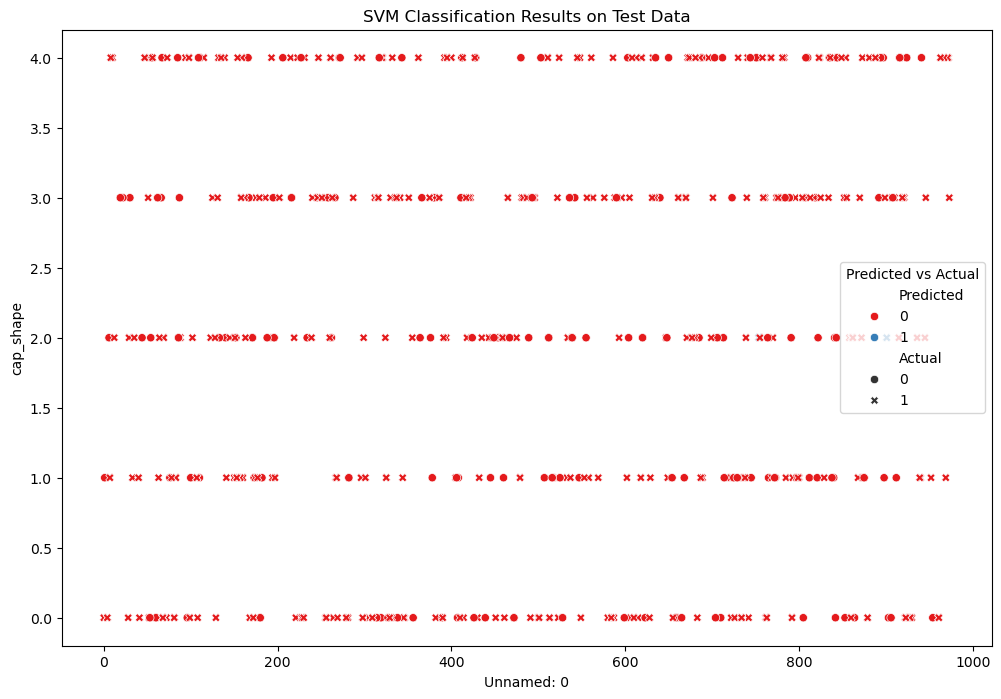

In [5]:
# Task 5: Visualization of SVM Results
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Convert the test features and predictions to a DataFrame for easier plotting
if isinstance(X_test, pd.DataFrame):
    # If X_test is a DataFrame, use the column names directly
    results_df = pd.DataFrame(X_test.iloc[:, :2].values, columns=X_test.columns[:2])  # Use the first two feature names
else:
    # If X_test is a NumPy array, just take the first two features
    results_df = pd.DataFrame(X_test[:, :2], columns=['Feature 1', 'Feature 2'])

# Add actual and predicted labels to the results DataFrame
results_df['Actual'] = y_test.reset_index(drop=True)
results_df['Predicted'] = y_pred

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=results_df, x=results_df.columns[0], y=results_df.columns[1], hue='Predicted', style='Actual', palette='Set1', markers=['o', 'X'])

plt.title('SVM Classification Results on Test Data')
plt.xlabel(results_df.columns[0])  # Use actual feature names
plt.ylabel(results_df.columns[1])  # Use actual feature names
plt.legend(title='Predicted vs Actual', loc='best')
plt.show()

In [6]:
# Task 6: Parameter Tuning and Optimization
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernels to be tested
}

# Create a SVM model
model = SVC(class_weight='balanced')

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters found
print("Best Parameters:")
print(grid_search.best_params_)

# Best score
print("Best Cross-validation Score:")
print(grid_search.best_score_)

# Use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

# Print confusion matrix and classification report for the best model
print("\nConfusion Matrix for Best Model:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best, zero_division=0))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters:
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-validation Score:
0.837857142857143

Confusion Matrix for Best Model:
[[114  71]
 [  0 415]]

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      0.62      0.76       185
           1       0.85      1.00      0.92       415

    accuracy                           0.88       600
   macro avg       0.93      0.81      0.84       600
weighted avg       0.90      0.88      0.87       600



In [7]:
# Task 7: Comparison and Analysis of SVM Kernels

# Define kernels to compare
kernels = ['linear', 'poly', 'rbf']

# Dictionary to store models and their results
results = {}

# Loop over kernels and train models
for kernel in kernels:
    model = SVC(kernel=kernel, class_weight='balanced', C=1, gamma=1)  # Using the best C and gamma from GridSearch
    model.fit(X_train_scaled, y_train)

    # Predict on test data
    y_pred = model.predict(X_test_scaled)

    # Store results
    results[kernel] = {
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, zero_division=0, output_dict=True)
    }
# Display results
for kernel, result in results.items():
    print(f"Kernel: {kernel}")
    print("Confusion Matrix:")
    print(result["confusion_matrix"])
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("-" * 50)

Kernel: linear
Confusion Matrix:
[[ 95  90]
 [188 227]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.76       185
           1       0.85      1.00      0.92       415

    accuracy                           0.88       600
   macro avg       0.93      0.81      0.84       600
weighted avg       0.90      0.88      0.87       600

--------------------------------------------------
Kernel: poly
Confusion Matrix:
[[132  53]
 [ 38 377]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.76       185
           1       0.85      1.00      0.92       415

    accuracy                           0.88       600
   macro avg       0.93      0.81      0.84       600
weighted avg       0.90      0.88      0.87       600

--------------------------------------------------
Kernel: rbf
Confusion Matrix:
[[114  71]
 [  0 415]]

Classification Report:
         